In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# Importing the dataset
dataset = pd.read_csv('car_data.csv')
dataset.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
dataset["owner"].isnull().sum()

0

In [4]:
dataset["owner"].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [5]:
X = dataset.iloc[:, [1,3,4,6]].values
y = dataset.iloc[:, 2].values

In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X[:,2]=lb.fit_transform(X[:,2])
lb1 = LabelEncoder()
X[:,3]=lb1.fit_transform(X[:,3])

In [7]:
print(X.shape)

(4340, 4)


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train[0,:])


[2015 175000 1 1]


In [9]:
lin_reg_model = LinearRegression()

In [10]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [11]:
training_data_prediction = lin_reg_model.predict(X_train)

In [12]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.43341512234775137


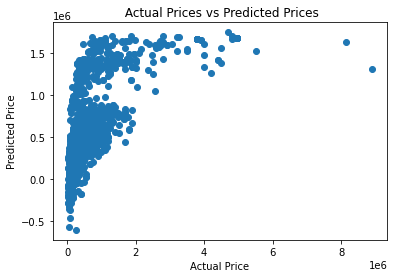

In [13]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [14]:
test_data_prediction = lin_reg_model.predict(X_test)

In [15]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.49404825555188847


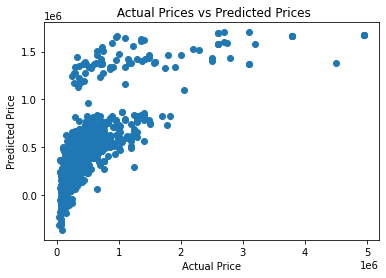

In [16]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [26]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

75.79783473129758 %


In [27]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4940475502933449


In [28]:
new_data=[2017,7000,"Petrol","Manual"]
new_data[2]=lb.transform([new_data[2]])[0]
new_data[3]=lb1.transform([new_data[3]])[0]

In [29]:
print(new_data)
regressor.predict([new_data])

[2017, 7000, 4, 1]


array([617422.22222222])

In [30]:
import pickle
pickle.dump(regressor,open('regressor.pkl','wb'))
pickle.dump(lb,open('lb','wb'))
pickle.dump(lb1,open('lb1','wb'))